In [1]:
!pip install ultralytics

In [2]:
import ultralytics

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from ultralytics import YOLO

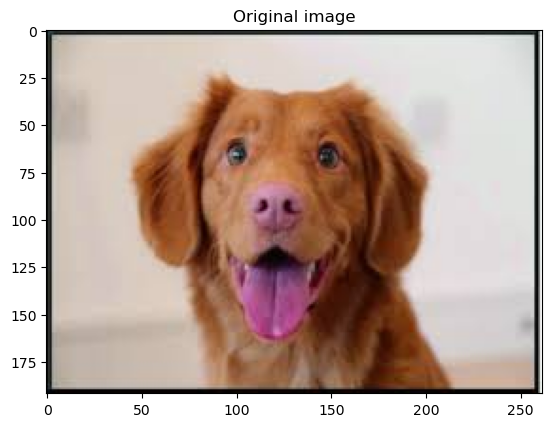

In [13]:
image = cv.imread('img4.jpg')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original image')
plt.show()

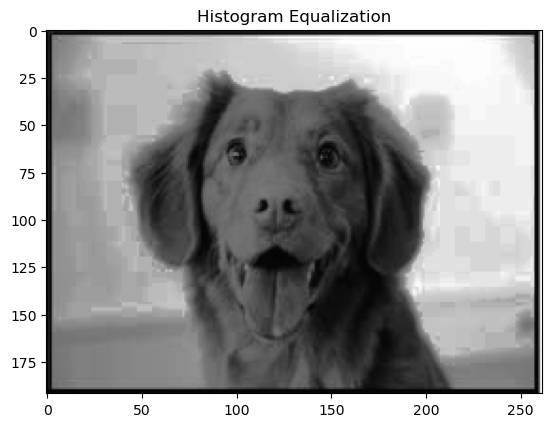

In [14]:
def histogram_equalization(image):
  img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  equalized_img = cv.equalizeHist(img_gray)
  return equalized_img

equalized_img = histogram_equalization(image)
plt.imshow(equalized_img, cmap='gray')
plt.title('Histogram Equalization')
plt.show()

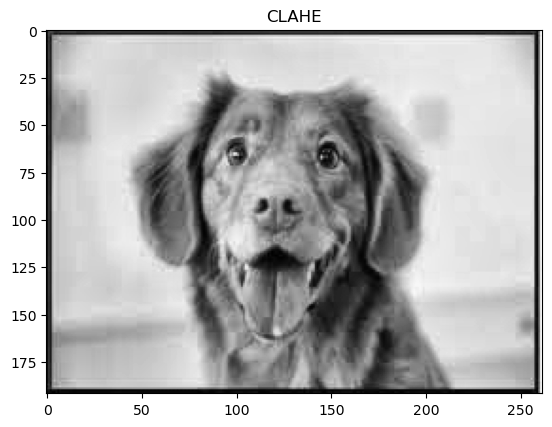

In [15]:
def clahe(image):
  img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  clahe_img = clahe.apply(img_gray)
  return clahe_img

clahe_img = clahe(image)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE')
plt.show()

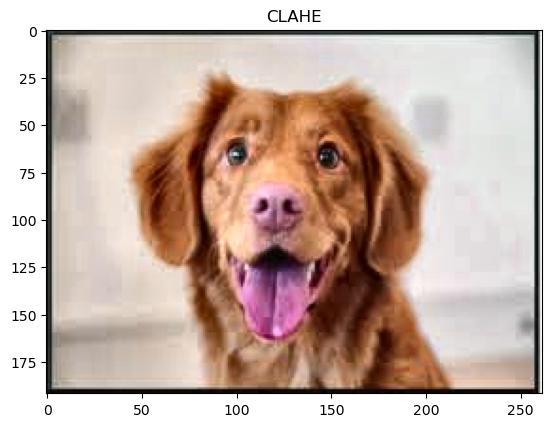

In [16]:
def clahe_enhanced(image):
  lab = cv.cvtColor(image, cv.COLOR_BGR2LAB)
  l_channel, a, b = cv.split(lab)
  clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl_img = clahe.apply(l_channel)
  enhanced_lab = cv.merge([cl_img, a, b])
  enhanced_img = cv.cvtColor(enhanced_lab, cv.COLOR_LAB2BGR)
  return enhanced_img

cl_img = clahe_enhanced(image)
# plt.imshow(cl_img, cmap='gray')
plt.imshow(cv.cvtColor(cl_img, cv.COLOR_BGR2RGB))
plt.title('CLAHE')
plt.show()

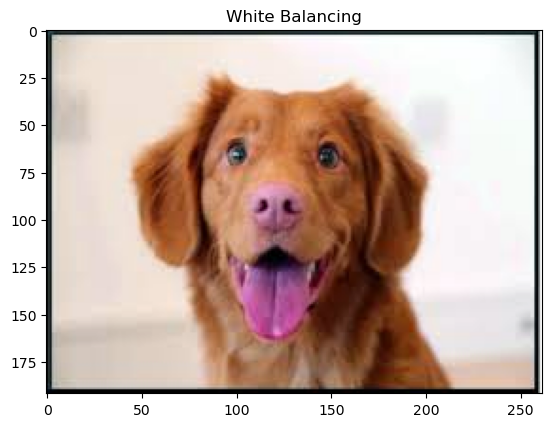

In [17]:
def white_balance (image):
  result = cv.xphoto.createSimpleWB().balanceWhite(image)
  return result

wb_img = white_balance(image)
plt.imshow(cv.cvtColor(wb_img, cv.COLOR_BGR2RGB))
plt.title('White Balancing')
plt.show()

In [9]:
model = YOLO("yolov8n.pt")

In [11]:
model.train(data="coco8.yaml", batch = 32 , epochs = 10, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.92 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.10.9 torch-2.3.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=10, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0
                   all          4         17       0.91      0.543       0.75      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/10         0G      1.081      2.176      1.478         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.79
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0
                   all          4         17      0.913       0.55      0.748      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/10         0G      1.001      1.491      1.238         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.76
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0
                   all          4         17      0.913       0.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0, 16, 17, 20, 25, 58])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000237D9CF0640>
fitness: 0.5654842778480426
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.2193,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.34825,     0.69841,     0.54501,     0.54501,     0.11357,     0.54501,     0.54501,     0.54501,
           0.54501,       0.995,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501,     0.54501, 


0: 480x640 1 dog, 180.9ms
Speed: 4.3ms preprocess, 180.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


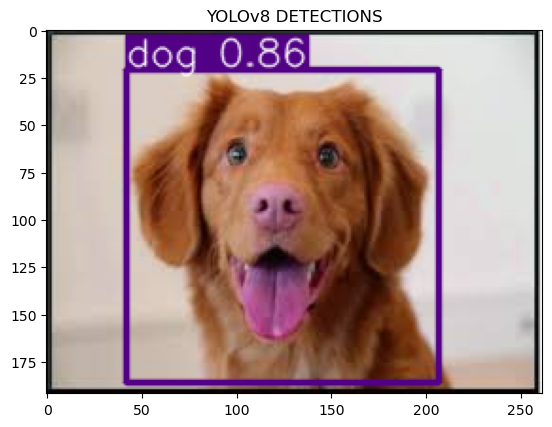

In [18]:
results1 = model(image)
annotated_frame = results1[0].plot()
plt.imshow(cv.cvtColor(annotated_frame, cv.COLOR_BGR2RGB))
plt.title('YOLOv8 DETECTIONS')
plt.show()